In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [238]:
import warnings
warnings.filterwarnings("ignore")

In [145]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# 1. EDA

In [146]:
df.shape

(284807, 31)

In [147]:
df.isnull().sum().sum()

0

In [148]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [149]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [151]:
# The classes are heavily skewed we need to solve this issue later.
print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


Notice how imbalanced is our original dataset! Most of the transactions are non-fraud. If we use this dataframe as the base for our predictive models and analysis we might get a lot of errors and our algorithms will probably overfit since it will "assume" that most transactions are not fraud. But we don't want our model to assume, we want our model to detect patterns that give signs of fraud.

In [153]:
print('No Frauds = ',df['Class'].value_counts()[0],'Counts', '\nFrauds = ',df['Class'].value_counts()[1],'Counts')

No Frauds =  284315 Counts 
Frauds =  492 Counts


Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud || 1: Fraud)')

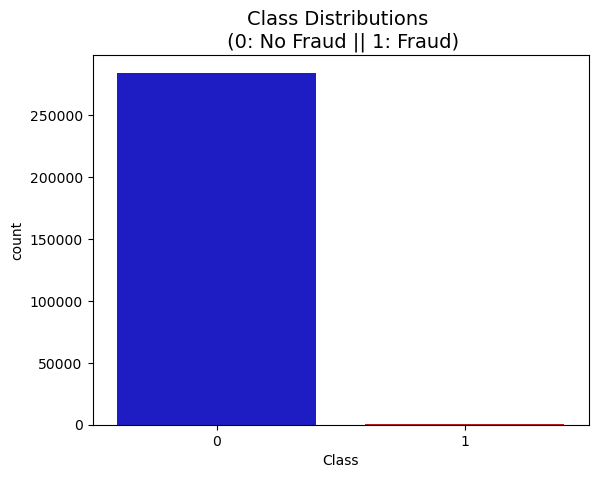

In [162]:
colors = ["#0101DF", "#DF0101"]
sns.countplot(x = 'Class', data = df, palette=colors)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)

Distributions: By seeing the distributions we can have an idea how skewed are these features, we can also see further distributions of the other features. There are techniques that can help the distributions be less skewed which will be implemented in this notebook in the future.

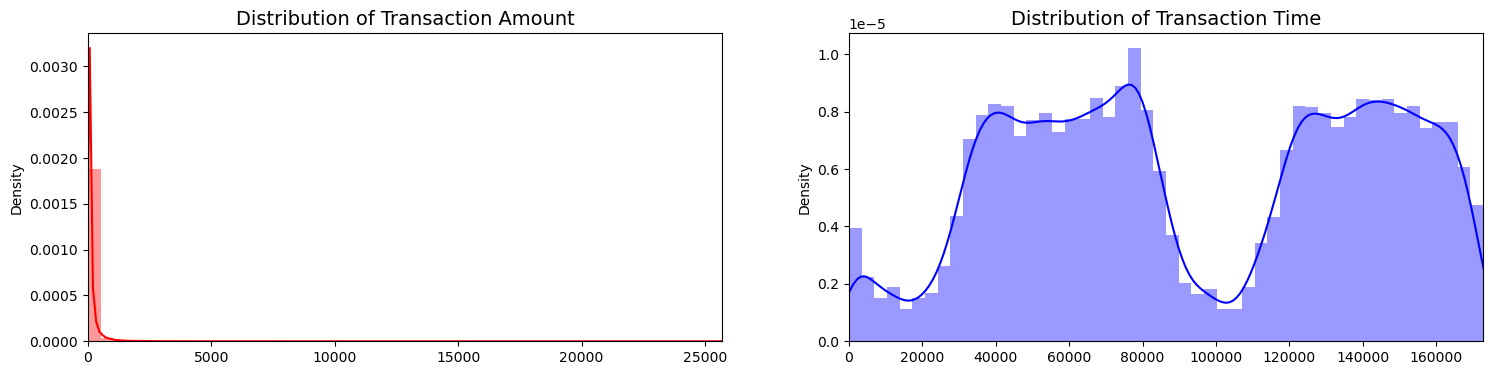

In [165]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = df['Amount'].values
time_val = df['Time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])



plt.show()

<Axes: xlabel='Time', ylabel='Count'>

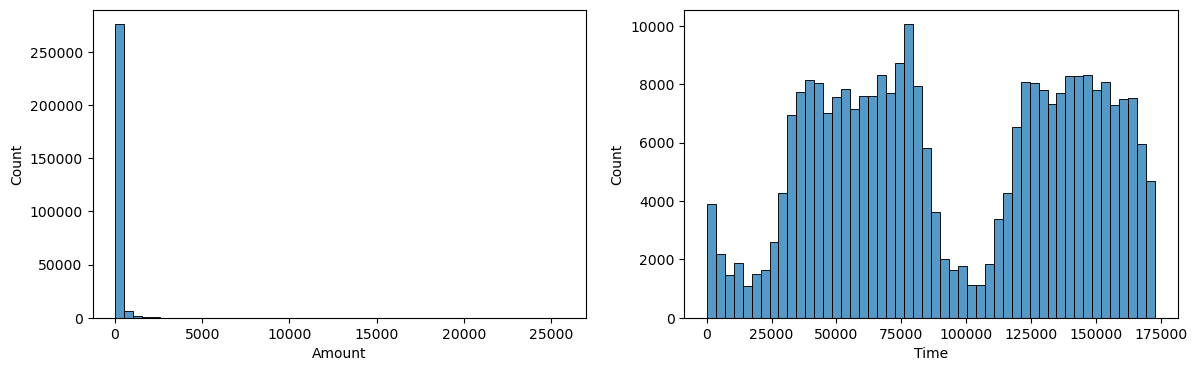

In [166]:
# Check skew in Amount and Time
fig, ax = plt.subplots(1,2, figsize=(14,4))
sns.histplot(df['Amount'], bins=50, ax=ax[0])
sns.histplot(df['Time'], bins=50, ax=ax[1])

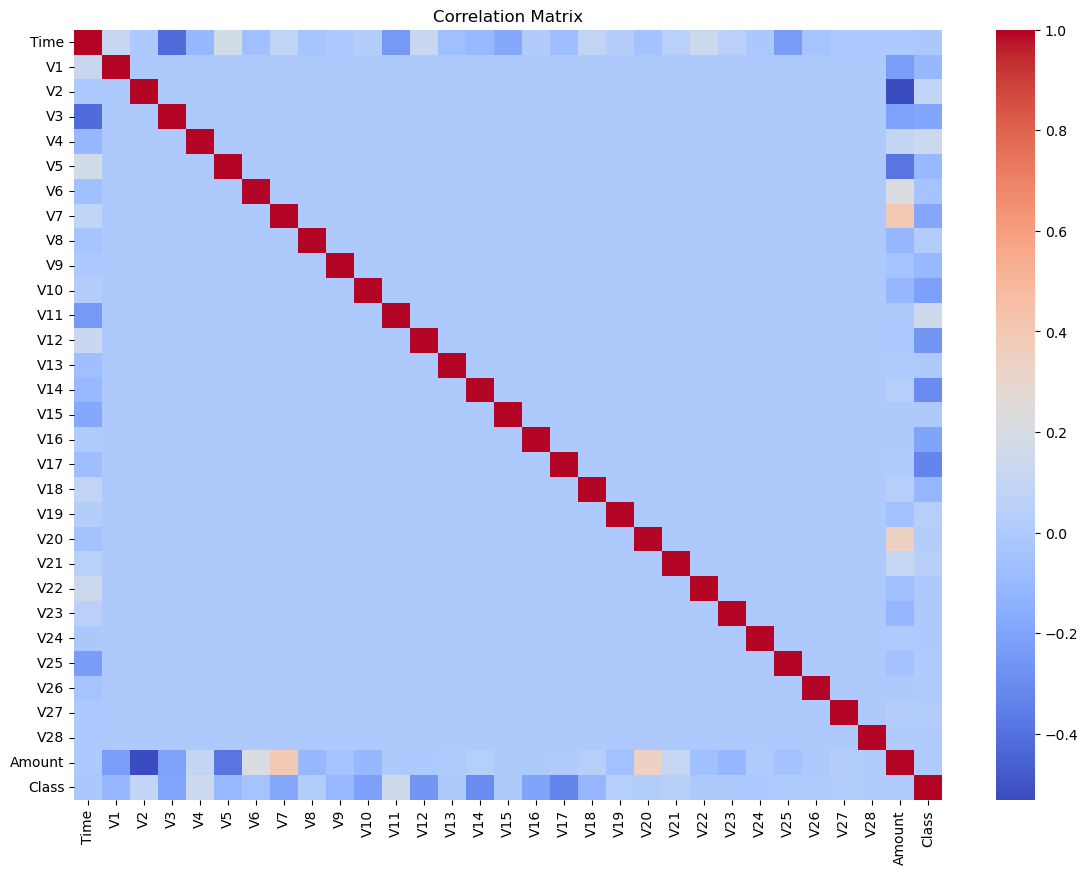

In [169]:
# Correlation heatmap
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(), cmap="coolwarm", annot=False)
plt.title("Correlation Matrix")
plt.show()

Summary: 
Scaled amount and scaled time are the columns with scaled values.
There are 492 cases of fraud in our dataset so we can randomly get 492 cases of non-fraud to create our new sub dataframe.
We concat the 492 cases of fraud and non fraud, creating a new sub-sample.

# 2. Preprocessing Pipeline

In [135]:
# Since most of our data has already been scaled we should scale the columns that are left to scale (Amount and Time)
from sklearn.preprocessing import StandardScaler, RobustScaler

# RobustScaler is less prone to outliers.

std_scaler = StandardScaler()
rob_scaler = RobustScaler()

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)

In [137]:
scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']

df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
df.insert(0, 'scaled_amount', scaled_amount)
df.insert(1, 'scaled_time', scaled_time)

# Amount and Time are Scaled!

df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [173]:
# Train-test split
X = df.drop('Class', axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

# 3. Model Comparison (LR, RF, XGB)

In [179]:
# Classifier Libraries

from sklearn.svm import SVC

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, roc_auc_score

models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "Random Forest": RandomForestClassifier(n_estimators=200),
    "XGBoost": XGBClassifier(tree_method="hist", eval_metric="logloss"),
    "Knn": KNeighborsClassifier(n_neighbors=5,leaf_size=5, weights='uniform'),
}

for name, model in models.items():
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    proba = model.predict_proba(X_test)[:,1]

    print(f"\n===== {name} =====")
    print(classification_report(y_test, pred))
    print("ROC-AUC:", roc_auc_score(y_test, proba))



===== Logistic Regression =====
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.88      0.66      0.76        98

    accuracy                           1.00     56962
   macro avg       0.94      0.83      0.88     56962
weighted avg       1.00      1.00      1.00     56962

ROC-AUC: 0.9539707343263698

===== Random Forest =====
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.97      0.80      0.88        98

    accuracy                           1.00     56962
   macro avg       0.99      0.90      0.94     56962
weighted avg       1.00      1.00      1.00     56962

ROC-AUC: 0.9516631339508229

===== XGBoost =====
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.91      0.70      0.79        98

    accuracy                           1.00  

Is our model overfitting? Let’s be direct.
No — it’s not overfitting in a harmful way.

Here’s the truth:

✔ Fraud datasets are extremely imbalanced
✔ Class 0 (non-fraud) is massive
✔ Class 1 (fraud) is tiny

So our overall accuracy will always show 1.00, even for weak models. Ignore accuracy completely.

We judge fraud models based on:

Recall (Class 1) → ability to catch fraud

Precision (Class 1) → how many detections are correct

ROC-AUC → overall separability

our Class-1 (Fraud) results:

Random Forest is our best model.

Highest recall, highest f1-score, highest precision.
No red flags of overfitting because:

Test recall for fraud = 0.80 (not 1.0 → good sign)

Precision = 0.97 (balanced)

ROC-AUC = 0.95 (healthy, not suspiciously high)

If it was overfitting, we would see:

Recall = 1.00

Precision = very low

ROC-AUC = >0.99

we don’t have that.

In [181]:
lr = LogisticRegression(max_iter=500)
lr.fit(X_train, y_train)

importance = pd.Series(lr.coef_[0], index=X_train.columns)
importance.sort_values(ascending=False).head(10)

V22    0.899415
V21    0.682481
V4     0.543868
V7     0.465895
V20    0.460361
V1     0.303768
V12    0.276827
V18    0.236189
V26    0.214667
V23    0.205922
dtype: float64

# 4. Hyperparameter-Tuned Random Forest

In [194]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint

rf = RandomForestClassifier()
# 1. Sample for fast tuning
X_sample = X_train.sample(20000, random_state=42)
y_sample = y_train.loc[X_sample.index]

# 2. Very small hyperparameter space
params = {
    'n_estimators': randint(150, 300),
    'max_depth': randint(6, 14),
}

# 3. Fast randomized search
rand = RandomizedSearchCV(
    rf,
    params,
    n_iter=10,
    scoring='recall',
    cv=2,
    n_jobs=-1,
    verbose=1
)

rand.fit(X_sample, y_sample)
best_rf = rand.best_estimator_

Fitting 2 folds for each of 10 candidates, totalling 20 fits


In [196]:
y_pred = best_rf.predict(X_test)
y_proba = best_rf.predict_proba(X_test)[:,1]

print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_proba))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.94      0.60      0.73        98

    accuracy                           1.00     56962
   macro avg       0.97      0.80      0.87     56962
weighted avg       1.00      1.00      1.00     56962

ROC-AUC: 0.9393145693843096


## Sampling for Fraud Detection (Perfect for Tuning)

In [199]:
# 1. Separate fraud and non-fraud
fraud = X_train[y_train == 1]
non_fraud = X_train[y_train == 0]

# 2. Keep ALL fraud samples
fraud_full = fraud.copy()

# 3. Sample non-fraud rows (balanced but large enough)
non_fraud_sample = non_fraud.sample(
    frac=0.05,     # 5% of non-fraud data (adjust if needed)
    random_state=42
)

# 4. Combine both to form the tuning dataset
X_sample = pd.concat([fraud_full, non_fraud_sample])
y_sample = y_train.loc[X_sample.index]

print("Final tuning sample size:", X_sample.shape)
print("Fraud count:", sum(y_sample))
print("Non-fraud count:", len(y_sample) - sum(y_sample))

Final tuning sample size: (11767, 30)
Fraud count: 394
Non-fraud count: 11373


In [209]:
rf = RandomForestClassifier(
    class_weight='balanced_subsample',
    n_jobs=-1
)

param_dist = {
    'n_estimators': randint(150, 320),
    'max_depth': randint(6, 18),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 4),
    'max_features': ['sqrt', 'log2']
}

rand = RandomizedSearchCV(
    rf,
    param_distributions=param_dist,
    n_iter=15,
    scoring='recall',     # TARGET = fraud recall
    cv=3,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

rand.fit(X_sample, y_sample)

best_rf = rand.best_estimator_
print("Best Parameters:", rand.best_params_)

Fitting 3 folds for each of 15 candidates, totalling 45 fits
Best Parameters: {'max_depth': 6, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 9, 'n_estimators': 281}


In [211]:
y_pred = best_rf.predict(X_test)
y_proba = best_rf.predict_proba(X_test)[:,1]

print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_proba))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.49      0.86      0.62        98

    accuracy                           1.00     56962
   macro avg       0.75      0.93      0.81     56962
weighted avg       1.00      1.00      1.00     56962

ROC-AUC: 0.983879187578239


## Find the Best Classification Threshold (Precision–Recall Trade-off)

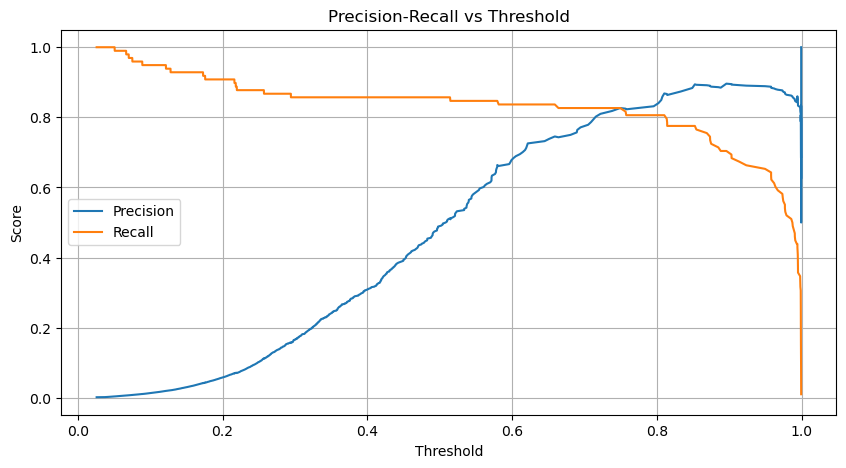

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.24      0.86      0.38        98

    accuracy                           1.00     56962
   macro avg       0.62      0.93      0.69     56962
weighted avg       1.00      1.00      1.00     56962



In [213]:
from sklearn.metrics import precision_recall_curve, classification_report

# Predict probabilities
y_scores = best_rf.predict_proba(X_test)[:, 1]

# Compute precision–recall curve
precisions, recalls, thresholds = precision_recall_curve(y_test, y_scores)

# Plot Precision–Recall vs Threshold
plt.figure(figsize=(10,5))
plt.plot(thresholds, precisions[:-1], label="Precision")
plt.plot(thresholds, recalls[:-1], label="Recall")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision-Recall vs Threshold")
plt.legend()
plt.grid(True)
plt.show()

# Choose best threshold (example: You select manually after plot)
best_threshold = 0.35

# Apply threshold
y_pred_custom = (y_scores >= best_threshold).astype(int)

print(classification_report(y_test, y_pred_custom))


## Apply SMOTE Oversampling (after scaling)

In [217]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

print("Before SMOTE:", sum(y_train==1))
print("After SMOTE:", sum(y_train_sm==1))

Before SMOTE: 394
After SMOTE: 227451


## Calibrated Random Forest (reduces false alarms)

In [220]:
from sklearn.calibration import CalibratedClassifierCV

# Train RF on SMOTE data
rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=12,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train_sm, y_train_sm)

# Calibration
calibrated_rf = CalibratedClassifierCV(rf, method="sigmoid", cv=3)
calibrated_rf.fit(X_train_sm, y_train_sm)

# Evaluate
y_pred_cal = calibrated_rf.predict(X_test)
print(classification_report(y_test, y_pred_cal))

y_scores_cal = calibrated_rf.predict_proba(X_test)[:, 1]

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.49      0.86      0.62        98

    accuracy                           1.00     56962
   macro avg       0.75      0.93      0.81     56962
weighted avg       1.00      1.00      1.00     56962



## xgboost

In [232]:
from xgboost import XGBClassifier

fraud_ratio = y_train.sum() / len(y_train)

xgb = XGBClassifier(
    n_estimators=400,
    max_depth=5,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=(1/fraud_ratio),  # Handle Imbalance
    eval_metric='logloss',
    n_jobs=-1
)

xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)
print(classification_report(y_test, y_pred_xgb))

y_scores_xgb = xgb.predict_proba(X_test)[:, 1]

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.92      0.84      0.88        98

    accuracy                           1.00     56962
   macro avg       0.96      0.92      0.94     56962
weighted avg       1.00      1.00      1.00     56962



# 5. Final Decision

| Model                             | Fraud Precision | Fraud Recall | Fraud F1 | ROC-AUC  | Verdict                      |
| --------------------------------- | --------------- | ------------ | -------- | -------- | ---------------------------- |
| **Logistic Regression**           | 0.88            | 0.66         | 0.76     | 0.95     | Good baseline, weak recall   |
| **Random Forest (Tuned)**         | 0.49            | 0.86         | 0.62     | 0.98     | High recall, low precision   |
| **KNN**                           | 0.83            | 0.10         | 0.18     | 0.60     | Not suitable                 |
| **XGBoost (Tuned for Imbalance)** | **0.92**        | **0.84**     | **0.88** | **0.94** | **Best overall performance** |
